In [1]:
#IMPORTS
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import regex as re
import nltk
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Deepika/Documents/emails.csv")

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
#Each line in the text starts with the word 'Subject'. Let's remove this using regex
df['text'] = df['text'].str.replace('Subject\:', '', regex = True)

In [5]:
df.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


## EDA and Simple Visualizations

<AxesSubplot:title={'center':'Number of ham and spam messages'}, xlabel='spam', ylabel='count'>

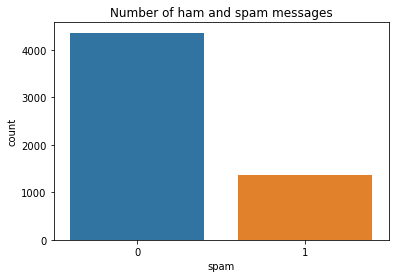

In [6]:
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

sns.countplot(df['spam'])

Text(0.5, 0, 'Text length')

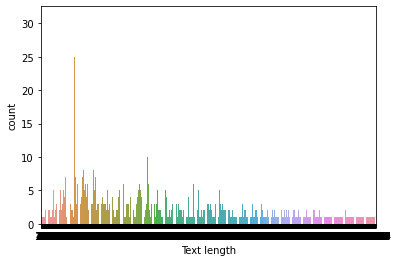

In [7]:
sns.countplot(x=[len(df.loc[i]['text']) for i in range(len(df))])
plt.xlabel('Text length')

In [8]:
df['message_len'] = df.text.apply(len)
df.head()

,text,spam,message_len
0,naturally irresistible your corporate identit...,1,1476
1,the stock trading gunslinger fanny is merril...,1,590
2,unbelievable new homes made easy im wanting ...,1,440
3,4 color printing special request additional ...,1,492
4,"do not have money , get software cds from her...",1,227


Text(0.5, 0, 'Message Length')

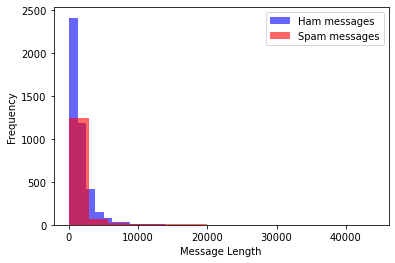

In [53]:
plt.figure(figsize=(6, 4))

df[df.spam==0].message_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.spam==1].message_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [10]:
df.dtypes

text           object
spam            int64
message_len     int64
dtype: object

In [11]:
#Adding a column for the numbers of charecters,words and sentences in each msg
df["No_of_Characters"] = df['text'].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1).apply(len)
df["No_of_sentences"]=df.apply(lambda row: nltk.sent_tokenize(row['text']), axis=1).apply(len)

In [12]:
df[['spam', 'No_of_Characters', 'No_of_Words', 'No_of_sentences']].value_counts()

spam  No_of_Characters  No_of_Words  No_of_sentences
1     438               95           9                  26
      339               74           7                  23
      531               100          6                  23
      158               34           6                   9
      968               202          18                  8
                                                        ..
0     952               199          21                  1
                        198          13                  1
      950               227          16                  1
                        199          12                  1
1     28424             6129         438                 1
Length: 5486, dtype: int64

In [13]:
df.head()

,text,spam,message_len,No_of_Characters,No_of_Words,No_of_sentences
0,naturally irresistible your corporate identit...,1,1476,1476,323,11
1,the stock trading gunslinger fanny is merril...,1,590,590,88,1
2,unbelievable new homes made easy im wanting ...,1,440,440,86,4
3,4 color printing special request additional ...,1,492,492,97,5
4,"do not have money , get software cds from her...",1,227,227,51,9


In [14]:
#Let us analyze the distribution of transcription length. 
#Before that, we need to remove outliers as they can make the graph biased (using a temp df called df2)

df2= df
cols = ['message_len'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df2[~((df2[cols] < (Q1 - 1.5 * IQR)) |(df2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


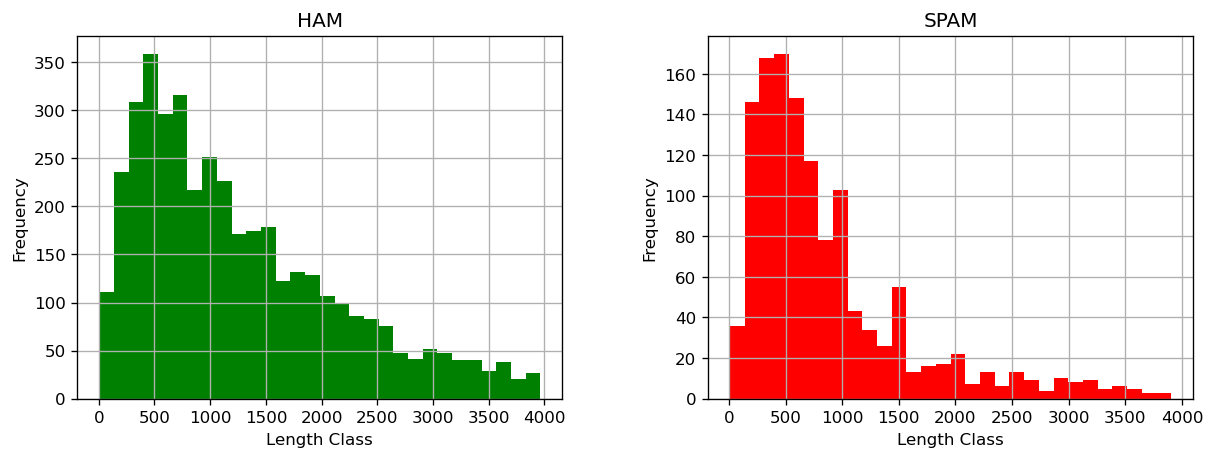

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)

df2[df2['spam']==0].hist(column='message_len', bins=30,ax=ax[0],color = 'green')
ax[0].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'HAM')
df2[df2['spam']==1].hist(column='message_len', bins=30,ax=ax[1],color = 'red')
ax[1].set(xlabel = 'Length Class',ylabel = 'Frequency',title = 'SPAM');

In [16]:
df.columns.to_list()

['text',
 'spam',
 'message_len',
 'No_of_Characters',
 'No_of_Words',
 'No_of_sentences']

## Text Cleaning and Pre-Processing

In [17]:
df.shape

(5728, 6)

In [18]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [19]:
from nltk import word_tokenize
def count_words(text):
    words = word_tokenize(text)
    return len(words)

df['count']=df['text'].apply(count_words)

In [20]:
df['count']

0       323
1        88
2        86
3        97
4        51
       ... 
5723    296
5724    243
5725    514
5726    275
5727    443
Name: count, Length: 5728, dtype: int64

In [21]:
df.groupby('spam')['count'].mean()

spam
0    344.835321
1    265.896199
Name: count, dtype: float64

In [22]:
import string
from nltk.corpus import stopwords

In [23]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [24]:
df['text']=df['text'].apply(process_text)

In [25]:
df['text']

0       naturally irresistible corporate identity lt r...
1       stock trading gunslinger fanny merrill muzo co...
2       unbelievable new homes made easy im wanting sh...
3       4 color printing special request additional in...
4       money get software cds software compatibility ...
                              ...                        
5723    research development charges gpg forwarded shi...
5724    receipts visit jim thanks invitation visit lsu...
5725    enron case study update wow day super thank mu...
5726    interest david please call shirley crenshaw as...
5727    news aurora 5 2 update aurora version 5 2 fast...
Name: text, Length: 5728, dtype: object

In [26]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [27]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [28]:
df['text']=df['text'].apply(stemming)

In [29]:
df.head()

,text,spam,message_len,No_of_Characters,No_of_Words,No_of_sentences,count
0,naturally irresistible corporate identity lt r...,1,1476,1476,323,11,323
1,stock trading gunslinger fanny merrill muzo co...,1,590,590,88,1,88
2,unbelievable new homes made easy im wanting sh...,1,440,440,86,4,86
3,4 color printing special request additional in...,1,492,492,97,5,97
4,money get software cds software compatibility ...,1,227,227,51,9,51


## NAIVE BAYES Model

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['spam'],test_size=0.20)

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [33]:
Naive = nb.fit(X_train,y_train)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       880
           1       0.97      0.99      0.98       266

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



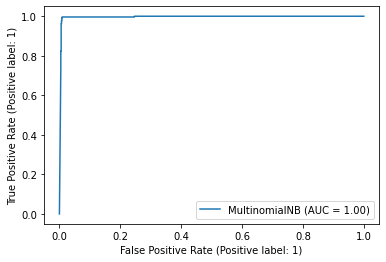

In [35]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

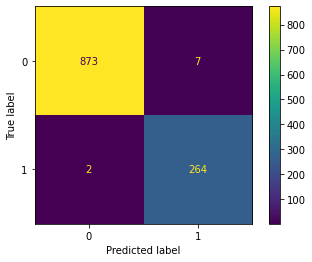

In [36]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

In [37]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 98.95237659754453  %


In [38]:
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))


COnfusion Matrix:
 [[873   7]
 [  2 264]]


In [39]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       880
           1       0.97      0.99      0.98       266

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [40]:
sample_text= ['you have won a free laptop! hurry to claim the offer',
             'hey call me back I will reach your place in 5 minutes']

### TESTING THE MODEL ON OUR OWN TEXT

In [41]:
Naive.predict(vectorizer.transform(sample_text))

array([1, 0], dtype=int64)

#Conclusion-

We can see that the Naive Bayes model performs really well and gives out predictions that make sense w.r.t spam and non spam.

A simple model like this is good for simple use cases.

However, with NLP, there are many advanced applications which need to use the context and meaning of the words, including the sequencing.

In cases like these, mainly to understand the sequencing, we can work with a LSTM model which understands the sequence of words and the patterns behind it. This approach is also carried over in many Large Language Models LLMs such as BERT, Fasttext, Glove, GPT-3, Chat GPT etc.

Let's experiment with a LSTM model now on this data.


### LSTM Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
%matplotlib inline

In [43]:
df.head(5)

,text,spam,message_len,No_of_Characters,No_of_Words,No_of_sentences,count
0,naturally irresistible corporate identity lt r...,1,1476,1476,323,11,323
1,stock trading gunslinger fanny merrill muzo co...,1,590,590,88,1,88
2,unbelievable new homes made easy im wanting sh...,1,440,440,86,4,86
3,4 color printing special request additional in...,1,492,492,97,5,97
4,money get software cds software compatibility ...,1,227,227,51,9,51


In [44]:
X = df.text
Y = df.spam
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [46]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [47]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    
    return model

In [48]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [49]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
31/31 [==============================] - 4s 93ms/step - loss: 0.3886 - accuracy: 0.8254 - val_loss: 0.1043 - val_accuracy: 0.9795
Epoch 2/10
31/31 [==============================] - 3s 84ms/step - loss: 0.1254 - accuracy: 0.9715 - val_loss: 0.0704 - val_accuracy: 0.9713


In [50]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [51]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 0s 11ms/step - loss: 0.0888 - accuracy: 0.9651


In [52]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.089
  Accuracy: 0.965


FINAL THOUGHTS

NOTE - If we need to build a model for deployment, we need to take more steps to ensure

1. The training and test corpus has to be balanced w.r.t to the Y variable before modelling i.e., since most of our data
is not spam, we can also perform model robustness tests with undersampling or oversampling.
2. We can also experiment with different vectorizers like TF-IDF to convert text into numeric form provided a large corpus exists to give more weightage to important words. The concern here is that spam transcripts have a lot of garbage words and hence I have used a simple count vectorizer for modeling in this simple use case.
2. We can deploy the model using Azure Web Service or AWS Endpoints or through JSON files embed into an application.
3. The deployed model can take in text as input and give out the predictions based on the probability
of spam nature in the words.